# Explore here

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, shapiro, levene, mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [47]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
data.to_csv("../data/raw/bank-marketing-campaign-data.csv", index=False)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


1. Exploración y limpieza de datos

In [48]:
data.shape

(41188, 21)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [50]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)

In [51]:
data.isnull().any().any()

False

In [52]:
data.shape

(41176, 21)

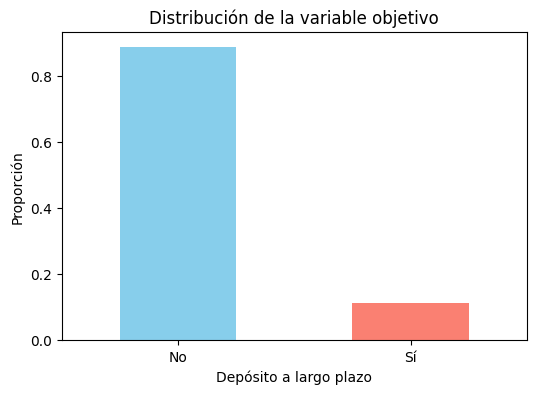

In [53]:
# Explorar la distribución de la variable objetivo
plt.figure(figsize=(6,4))
data['y'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de la variable objetivo')
plt.xlabel('Depósito a largo plazo')
plt.ylabel('Proporción')
plt.xticks([0,1], ['No', 'Sí'], rotation=0)
plt.show()

Información irrelevante / prescindible:

- 'contact': El método de contacto puede no ser relevante si se supone que todos los clientes ya están en la base de datos y se les puede contactar de cualquier manera.

- 'month' y 'day_of_week': A menos que el mes o el día de la semana del último contacto tengan un impacto significativo en la probabilidad de contratar un depósito a largo plazo, estas columnas podrían considerarse menos relevantes.

- 'duration': La duración del último contacto en segundos puede no ser relevante si solo estamos interesados en si el cliente suscribirá un depósito a largo plazo o no, independientemente de la duración del contacto.

- 'campaign': El número de contactos realizados durante esta campaña podría no ser relevante si solo estamos interesados en el resultado final (si el cliente suscribe o no un depósito a largo plazo) y no en el proceso específico de la campaña.

- 'pdays' y 'previous': El número de días desde el último contacto en una campaña anterior y el número de contactos realizados antes de esta campaña podrían no ser relevantes si estamos enfocados en identificar clientes potenciales para un depósito a largo plazo en la campaña actual.

- 'poutcome': A menos que el resultado de la campaña de marketing anterior tenga un impacto significativo en la probabilidad de contratar un depósito a largo plazo en la campaña actual, esta columna podría considerarse menos relevante.

Relación entre variables categóricas y variable objetivo (categórica):

In [54]:
# calculamos el valor p para la prueba chi-cuadrado entre cada columna categórica y la variable objetivo 'y'.
# Un valor p pequeño (<0.05) indica una asociación significativa entre la variable categórica y la variable objetivo,
# lo que sugiere que la columna categórica podría ser relevante para el análisis.

# Calculamos la tabla de contingencia entre "contact" y "y"
contingency_table_contact = pd.crosstab(data['contact'], data['y'])
# Realizamos la prueba chi-cuadrado entre "contact" y "y"
chi2_contact, p_contact, _, _ = chi2_contingency(contingency_table_contact)
print("Valor p para 'contact':", p_contact)

# Repetimos el proceso para las otras columnas categóricas
contingency_table_month = pd.crosstab(data['month'], data['y'])
chi2_month, p_month, _, _ = chi2_contingency(contingency_table_month)
print("Valor p para 'month':", p_month)

contingency_table_day_of_week = pd.crosstab(data['day_of_week'], data['y'])
chi2_day_of_week, p_day_of_week, _, _ = chi2_contingency(contingency_table_day_of_week)
print("Valor p para 'day_of_week':", p_day_of_week)

contingency_table_day_of_week = pd.crosstab(data['poutcome'], data['y'])
chi2_day_of_week, p_day_of_week, _, _ = chi2_contingency(contingency_table_day_of_week)
print("Valor p para 'poutcome':", p_day_of_week)

contingency_table_day_of_week = pd.crosstab(data['default'], data['y'])
chi2_day_of_week, p_day_of_week, _, _ = chi2_contingency(contingency_table_day_of_week)
print("Valor p para 'default':", p_day_of_week)

contingency_table_day_of_week = pd.crosstab(data['loan'], data['y'])
chi2_day_of_week, p_day_of_week, _, _ = chi2_contingency(contingency_table_day_of_week)
print("Valor p para 'loan':", p_day_of_week)

Valor p para 'contact': 1.7187406241263769e-189
Valor p para 'month': 0.0
Valor p para 'day_of_week': 3.085754965631743e-05
Valor p para 'poutcome': 0.0
Valor p para 'default': 5.2175408937279634e-89
Valor p para 'loan': 0.5771532081176227


Todos los valores p son muy pequeños salvo para loan, lo que indica una asociación significativa entre las columnas categóricas y la variable objetivo 'y'. Esto sugiere que estas características pueden ser importantes predictores para el modelo de clasificación

Relación entre variables numéricas y variable objetivo (categórica):

Para elegir la prueba más idonea, examinaremos el contexto de los datos y de si cumplen los supuestos de las pruebas paramétricas. Para ello, observaremos la distribucion y la varianza.

Normalidad:

- Histograma: Visualiza la distribución de los datos con un histograma y compara con una distribución normal.
- Prueba de normalidad: Utiliza pruebas estadísticas como la prueba de Shapiro-Wilk o la prueba de Kolmogorov-Smirnov para evaluar si los datos siguen una distribución normal. Un valor p alto (> 0.05) indica que los datos pueden considerarse normalmente distribuidos.

Homogeneidad de varianzas:

- Gráfico de dispersión: Grafica los datos para ver si las varianzas son consistentes en todos los grupos.
- Prueba de homogeneidad de varianzas: Utiliza pruebas estadísticas como la prueba de Levene o la prueba de Bartlett para evaluar si las varianzas son iguales entre los grupos. Un valor p alto (> 0.05) indica que las varianzas son homogéneas.

/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)
/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)
/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)
/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)


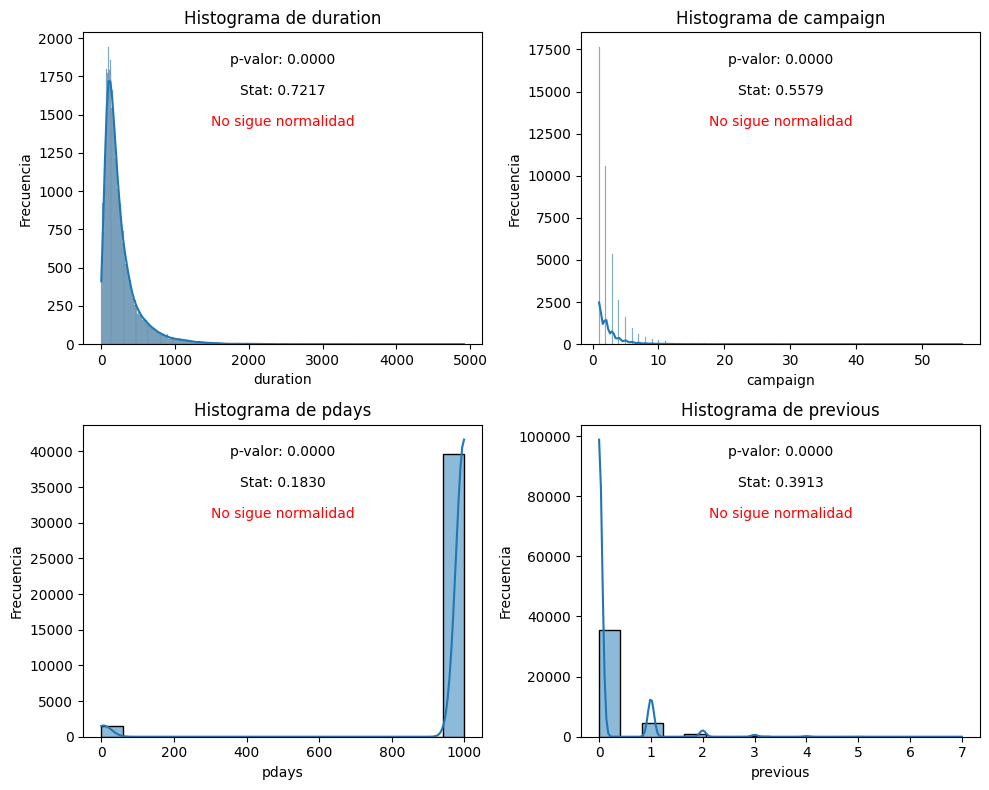

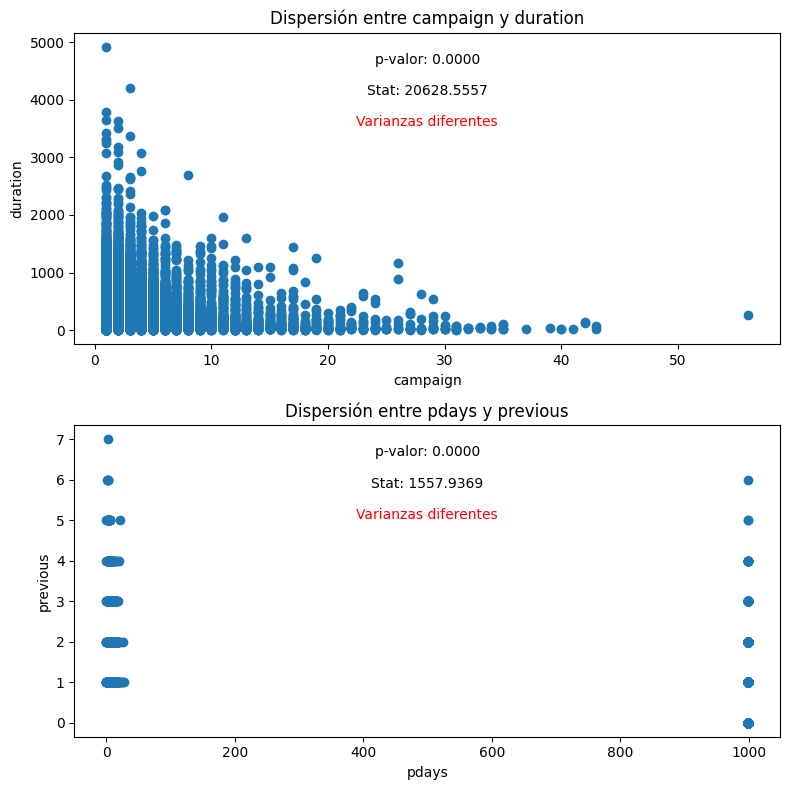

In [55]:
# Figura y ejes para los histogramas y las pruebas de normalidad
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Histogramas y pruebas de normalidad de Shapiro-Wilk
for i, column in enumerate(['duration', 'campaign', 'pdays', 'previous']):
    # Histograma
    sns.histplot(data[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histograma de {column}')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Frecuencia')

    # Prueba de normalidad de Shapiro-Wilk
    stat, p_value = shapiro(data[column])
    axes[i//2, i%2].text(0.5, 0.9, f'p-valor: {p_value:.4f}', transform=axes[i//2, i%2].transAxes, ha='center')
    axes[i//2, i%2].text(0.5, 0.8, f'Stat: {stat:.4f}', transform=axes[i//2, i%2].transAxes, ha='center')
    if p_value < 0.05:
        axes[i//2, i%2].text(0.5, 0.7, 'No sigue normalidad', transform=axes[i//2, i%2].transAxes, ha='center', color='red')
    else:
        axes[i//2, i%2].text(0.5, 0.7, 'Sigue normalidad', transform=axes[i//2, i%2].transAxes, ha='center', color='green')

# Ajustar espaciado entre subparcelas
plt.tight_layout()

# Figura y ejes para los gráficos de dispersión y las pruebas de homogeneidad de varianzas
fig2, axes2 = plt.subplots(2, figsize=(8, 8))

# Gráficos de dispersión y pruebas de homogeneidad de varianzas de Levene
for i, (column1, column2) in enumerate([('campaign', 'duration'), ('pdays', 'previous')]):
    # Gráfico de dispersión
    axes2[i].scatter(data[column1], data[column2])
    axes2[i].set_title(f'Dispersión entre {column1} y {column2}')
    axes2[i].set_xlabel(column1)
    axes2[i].set_ylabel(column2)

    # Prueba de homogeneidad de varianzas de Levene
    stat, p_value = levene(data[column1], data[column2])
    axes2[i].text(0.5, 0.9, f'p-valor: {p_value:.4f}', transform=axes2[i].transAxes, ha='center')
    axes2[i].text(0.5, 0.8, f'Stat: {stat:.4f}', transform=axes2[i].transAxes, ha='center')
    if p_value < 0.05:
        axes2[i].text(0.5, 0.7, 'Varianzas diferentes', transform=axes2[i].transAxes, ha='center', color='red')
    else:
        axes2[i].text(0.5, 0.7, 'Varianzas iguales', transform=axes2[i].transAxes, ha='center', color='green')

# Ajustar espaciado entre subparcelas
plt.tight_layout()

/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)
/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)
/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)
/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41176.
  res = hypotest_fun_out(*samples, **kwds)
/home/vscode/.local/lib/python3.10/site-packages/scipy/stats

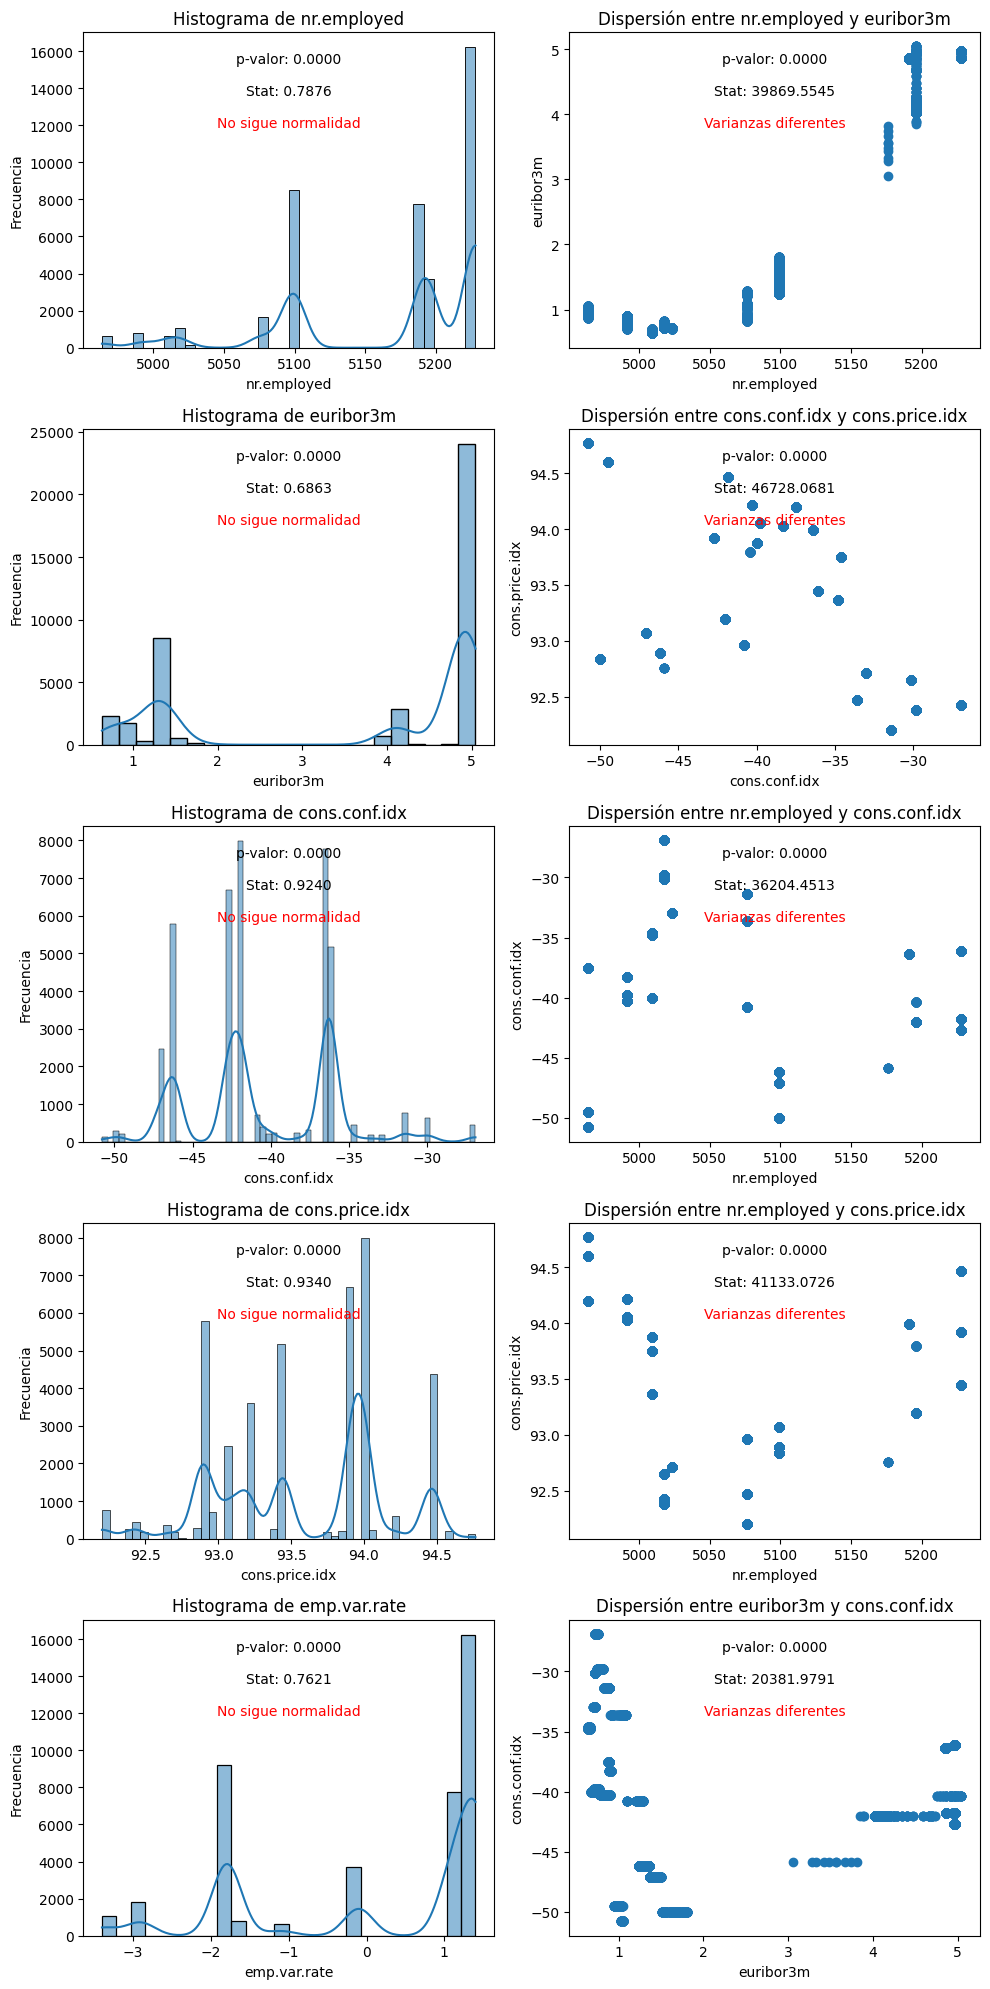

In [56]:
# Figura y ejes para los histogramas y las pruebas de normalidad
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

# Histogramas y pruebas de normalidad de Shapiro-Wilk para las nuevas columnas
for i, column in enumerate(['nr.employed', 'euribor3m', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate']):
    # Histograma
    sns.histplot(data[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frecuencia')

    # Prueba de normalidad de Shapiro-Wilk
    stat, p_value = shapiro(data[column])
    axes[i, 0].text(0.5, 0.9, f'p-valor: {p_value:.4f}', transform=axes[i, 0].transAxes, ha='center')
    axes[i, 0].text(0.5, 0.8, f'Stat: {stat:.4f}', transform=axes[i, 0].transAxes, ha='center')
    if p_value < 0.05:
        axes[i, 0].text(0.5, 0.7, 'No sigue normalidad', transform=axes[i, 0].transAxes, ha='center', color='red')
    else:
        axes[i, 0].text(0.5, 0.7, 'Sigue normalidad', transform=axes[i, 0].transAxes, ha='center', color='green')

# Gráficos de dispersión y pruebas de homogeneidad de varianzas de Levene para las nuevas columnas
for i, (column1, column2) in enumerate([('nr.employed', 'euribor3m'), ('cons.conf.idx', 'cons.price.idx'), ('nr.employed', 'cons.conf.idx'), ('nr.employed', 'cons.price.idx'), ('euribor3m', 'cons.conf.idx')]):
    # Gráfico de dispersión
    axes[i, 1].scatter(data[column1], data[column2])
    axes[i, 1].set_title(f'Dispersión entre {column1} y {column2}')
    axes[i, 1].set_xlabel(column1)
    axes[i, 1].set_ylabel(column2)

    # Prueba de homogeneidad de varianzas de Levene
    stat, p_value = levene(data[column1], data[column2])
    axes[i, 1].text(0.5, 0.9, f'p-valor: {p_value:.4f}', transform=axes[i, 1].transAxes, ha='center')
    axes[i, 1].text(0.5, 0.8, f'Stat: {stat:.4f}', transform=axes[i, 1].transAxes, ha='center')
    if p_value < 0.05:
        axes[i, 1].text(0.5, 0.7, 'Varianzas diferentes', transform=axes[i, 1].transAxes, ha='center', color='red')
    else:
        axes[i, 1].text(0.5, 0.7, 'Varianzas iguales', transform=axes[i, 1].transAxes, ha='center', color='green')

# Ajustar espaciado entre subparcelas
plt.tight_layout()


Vemos que las columnas numéricas no siguen una distribución normal y no hay homogeneidad en las varianzas, por lo que realizaremos la prueba no paramétrica de Mann-Whitney U, ya que queremos comparar cada columna numérica con la variable objetivo (categórica).

In [57]:
# Definir la variable objetivo categórica
y = data['y']

# Realizar la prueba de Mann-Whitney U para cada columna numérica
for column in ['duration', 'campaign', 'pdays', 'previous', 'nr.employed', 'euribor3m', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate']:
    # Calcular la prueba de Mann-Whitney U
    stat, p_value = mannwhitneyu(data[column][y == 'yes'], data[column][y == 'no'])
    
    # Imprimir los resultados
    print(f"Prueba de Mann-Whitney U para '{column}':")
    print("  Estadístico de prueba:", stat)
    print("  Valor p:", p_value)
    if p_value < 0.05:
        print("  Hay una diferencia significativa entre las muestras.\n")
    else:
        print("  No hay una diferencia significativa entre las muestras.\n")

Prueba de Mann-Whitney U para 'duration':
  Estadístico de prueba: 138721931.0
  Valor p: 0.0
  Hay una diferencia significativa entre las muestras.

Prueba de Mann-Whitney U para 'campaign':
  Estadístico de prueba: 75391969.5
  Valor p: 3.6293827168458346e-38
  Hay una diferencia significativa entre las muestras.

Prueba de Mann-Whitney U para 'pdays':
  Estadístico de prueba: 68346066.0
  Valor p: 0.0
  Hay una diferencia significativa entre las muestras.

Prueba de Mann-Whitney U para 'previous':
  Estadístico de prueba: 103274848.5
  Valor p: 0.0
  Hay una diferencia significativa entre las muestras.

Prueba de Mann-Whitney U para 'nr.employed':
  Estadístico de prueba: 42551676.5
  Valor p: 0.0
  Hay una diferencia significativa entre las muestras.

Prueba de Mann-Whitney U para 'euribor3m':
  Estadístico de prueba: 43488310.0
  Valor p: 0.0
  Hay una diferencia significativa entre las muestras.

Prueba de Mann-Whitney U para 'cons.conf.idx':
  Estadístico de prueba: 91054962.5
 

El resultado sugiere que las columnas numéricas tienen un impacto significativo en la variable objetivo 'y', por lo que las mantendremos.

In [58]:
data.drop('loan', axis=1, inplace=True)

2. Analysis univariante variables (categorical / numeric) 

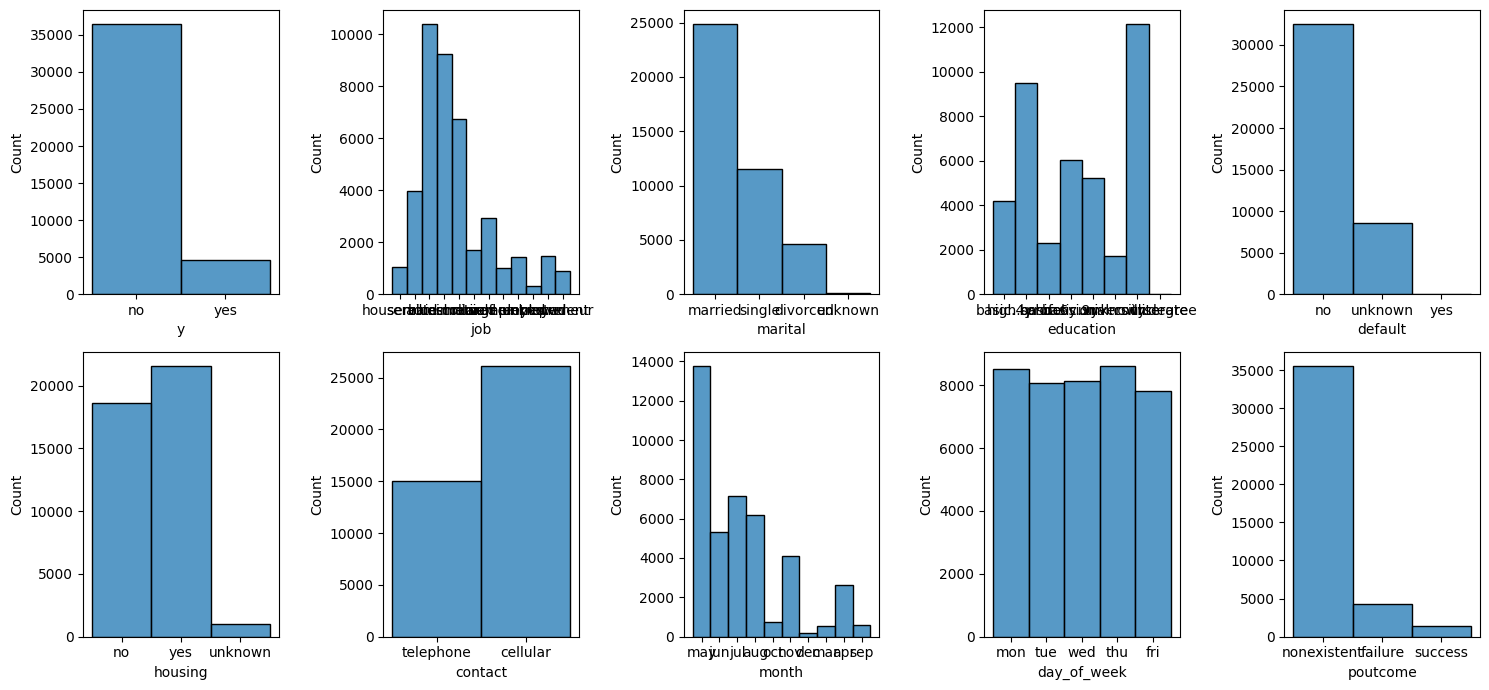

In [59]:
fig, axis = plt.subplots(2, 5, figsize = (15, 7))

# Creating a multiple histogram:
sns.histplot(ax = axis[0, 0], data = data, x = "y")
sns.histplot(ax = axis[0, 1], data = data, x = "job")
sns.histplot(ax = axis[0, 2], data = data, x = "marital")
sns.histplot(ax = axis[0, 3], data = data, x = "education")
sns.histplot(ax = axis[0, 4], data = data, x = "default")
sns.histplot(ax = axis[1, 0], data = data, x = "housing")
sns.histplot(ax = axis[1, 1], data = data, x = "contact")
sns.histplot(ax = axis[1, 2], data = data, x = "month")
sns.histplot(ax = axis[1, 3], data = data, x = "day_of_week")
sns.histplot(ax = axis[1, 4], data = data, x = "poutcome")

#Adjust the plot
plt.tight_layout()

plt.show()

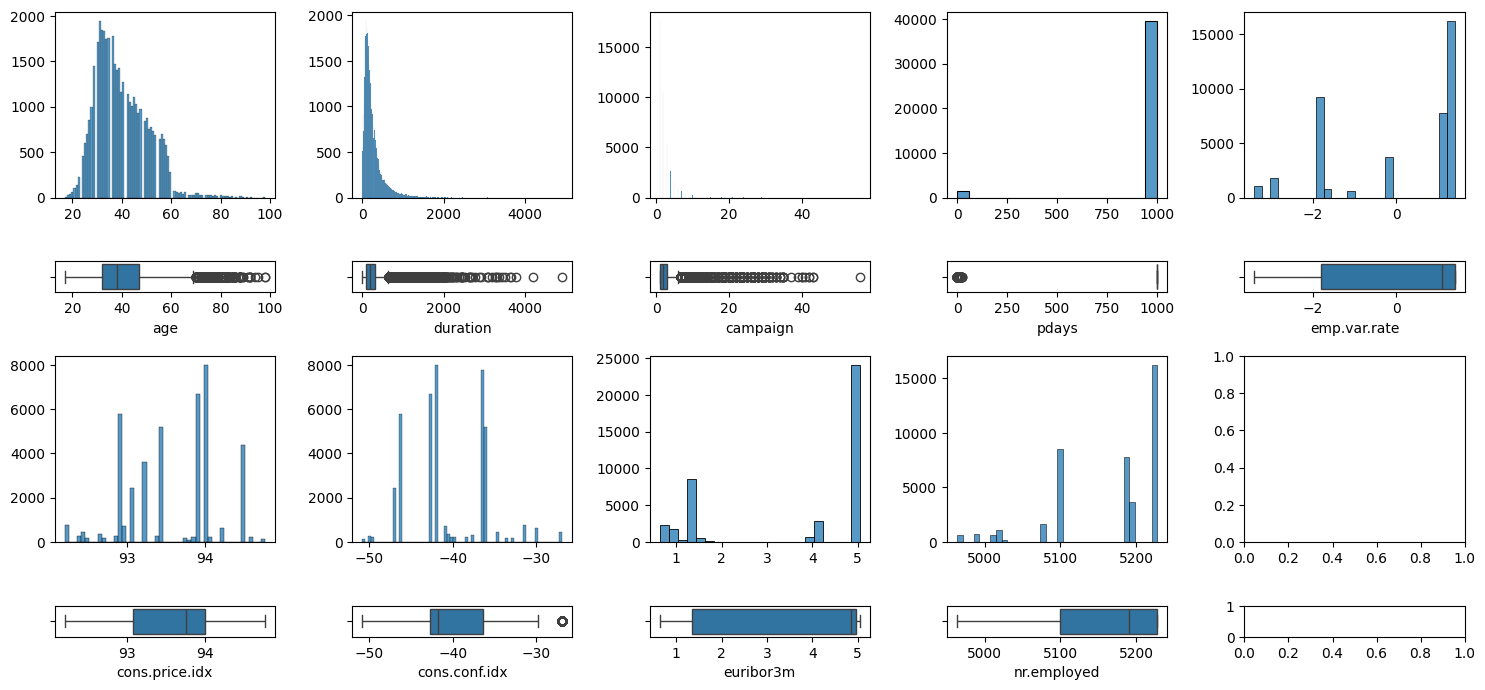

In [60]:
fig, axis = plt.subplots(4, 5, figsize = (15, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None, ylabel = None) 
sns.boxplot(ax = axis[1, 0], data = data, x = "age") 
sns.histplot(ax = axis[0, 1], data = data, x = "duration").set(xlabel = None, ylabel = None) 
sns.boxplot(ax = axis[1, 1], data = data, x = "duration") 
sns.histplot(ax = axis[0, 2], data = data, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data, x = "campaign")
sns.histplot(ax = axis[0, 3], data = data, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = data, x = "pdays")
sns.histplot(ax = axis[0, 4], data = data, x = "emp.var.rate").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 4], data = data, x = "emp.var.rate")
sns.histplot(ax = axis[2, 0], data = data, x = "cons.price.idx").set(xlabel = None, ylabel = None) 
sns.boxplot(ax = axis[3, 0], data = data, x = "cons.price.idx") 
sns.histplot(ax = axis[2, 1], data = data, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "cons.conf.idx")
sns.histplot(ax = axis[2, 2], data = data, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = data, x = "euribor3m")
sns.histplot(ax = axis[2, 3], data = data, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = data, x = "nr.employed")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


3. Analysis multivariante variables (numerical - numerical / categorical-categorical / *codificación* / numerical-categorical)

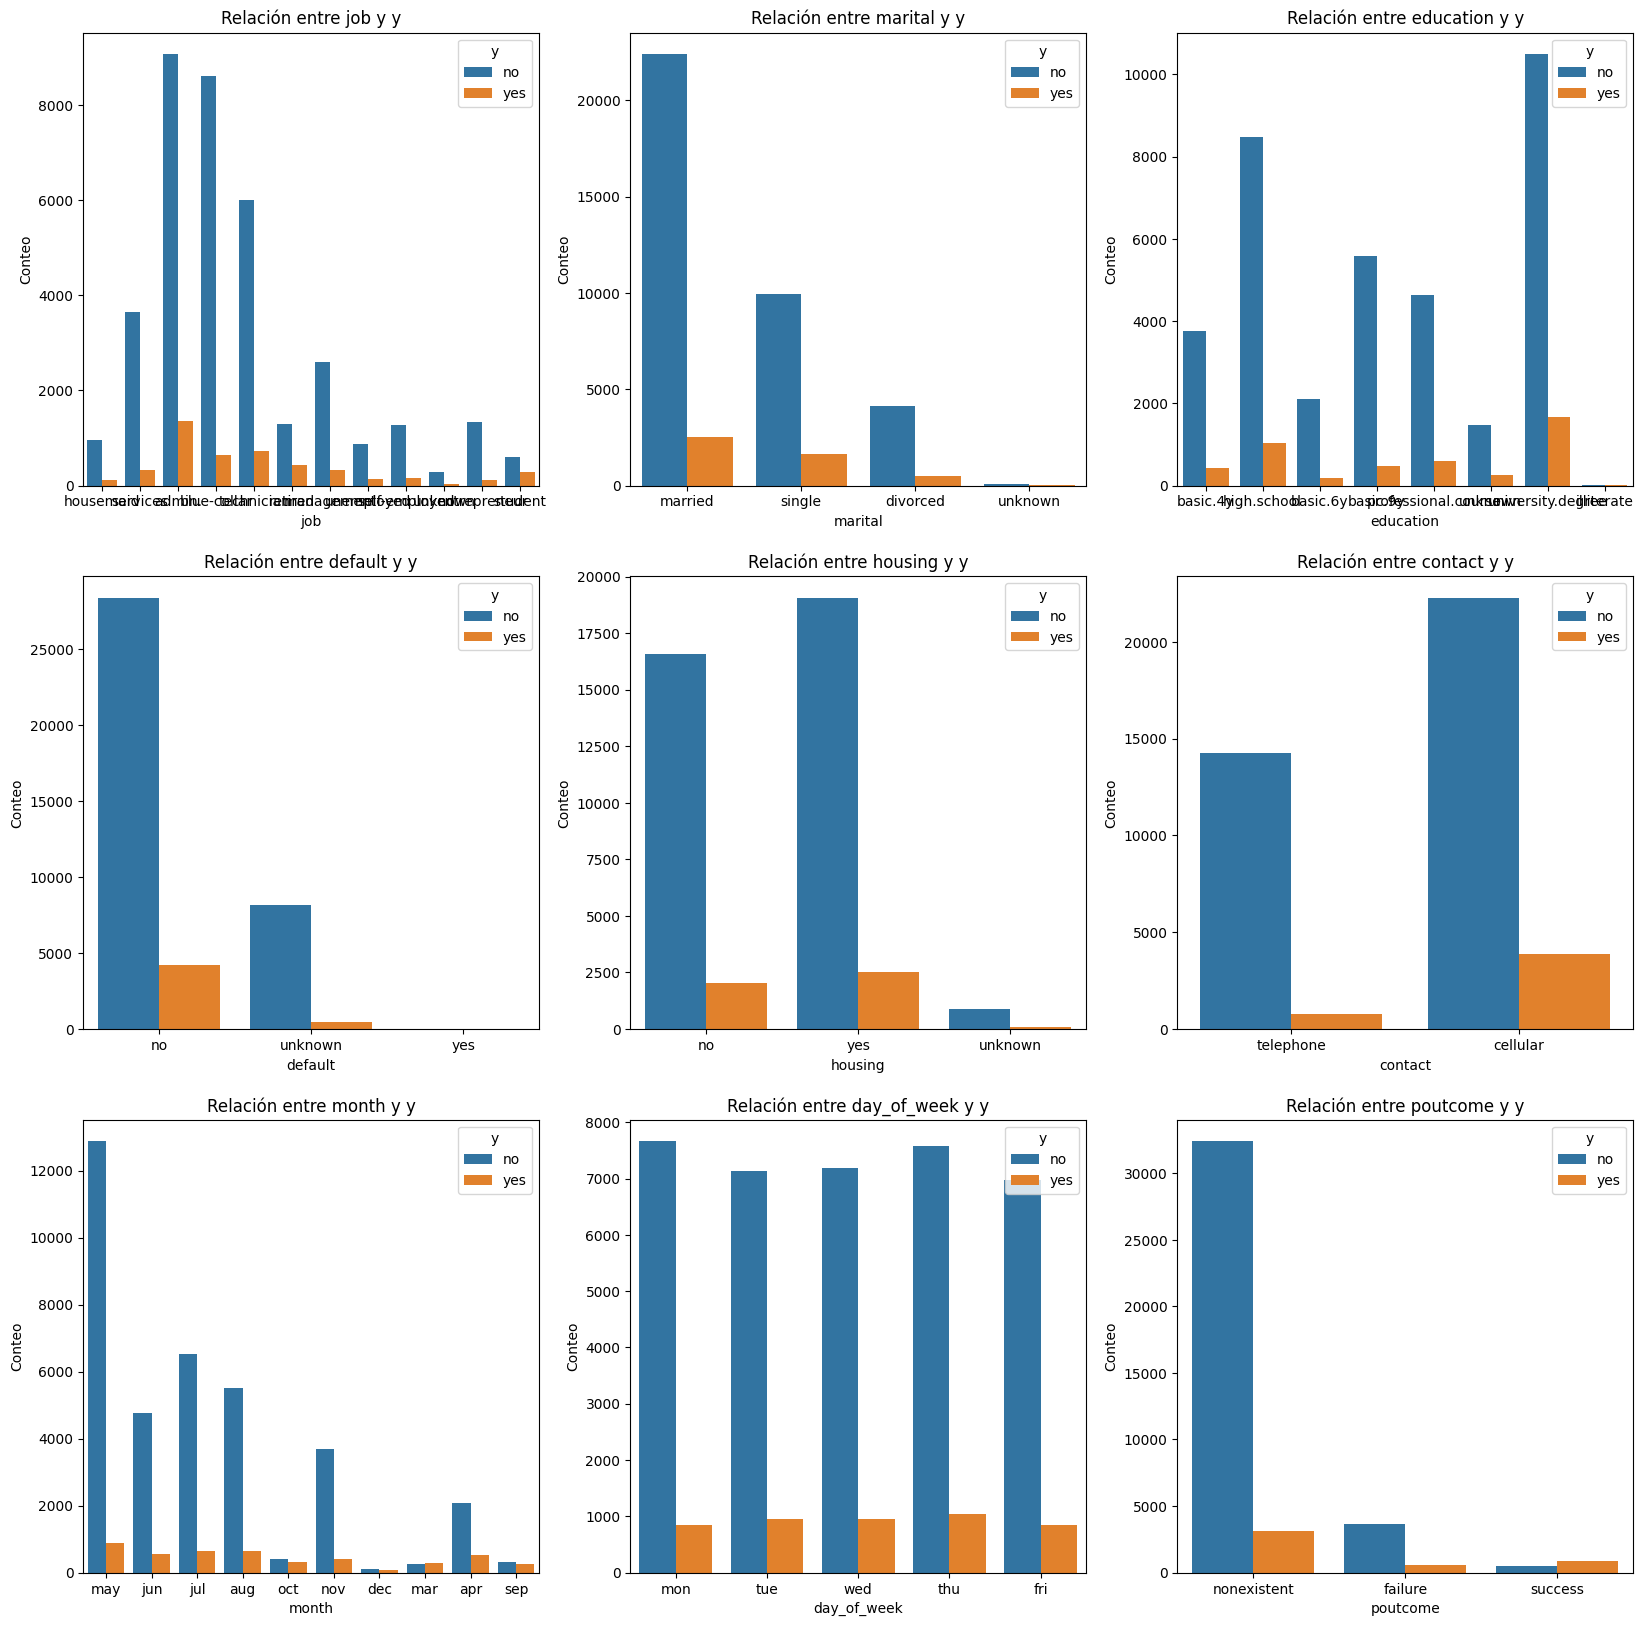

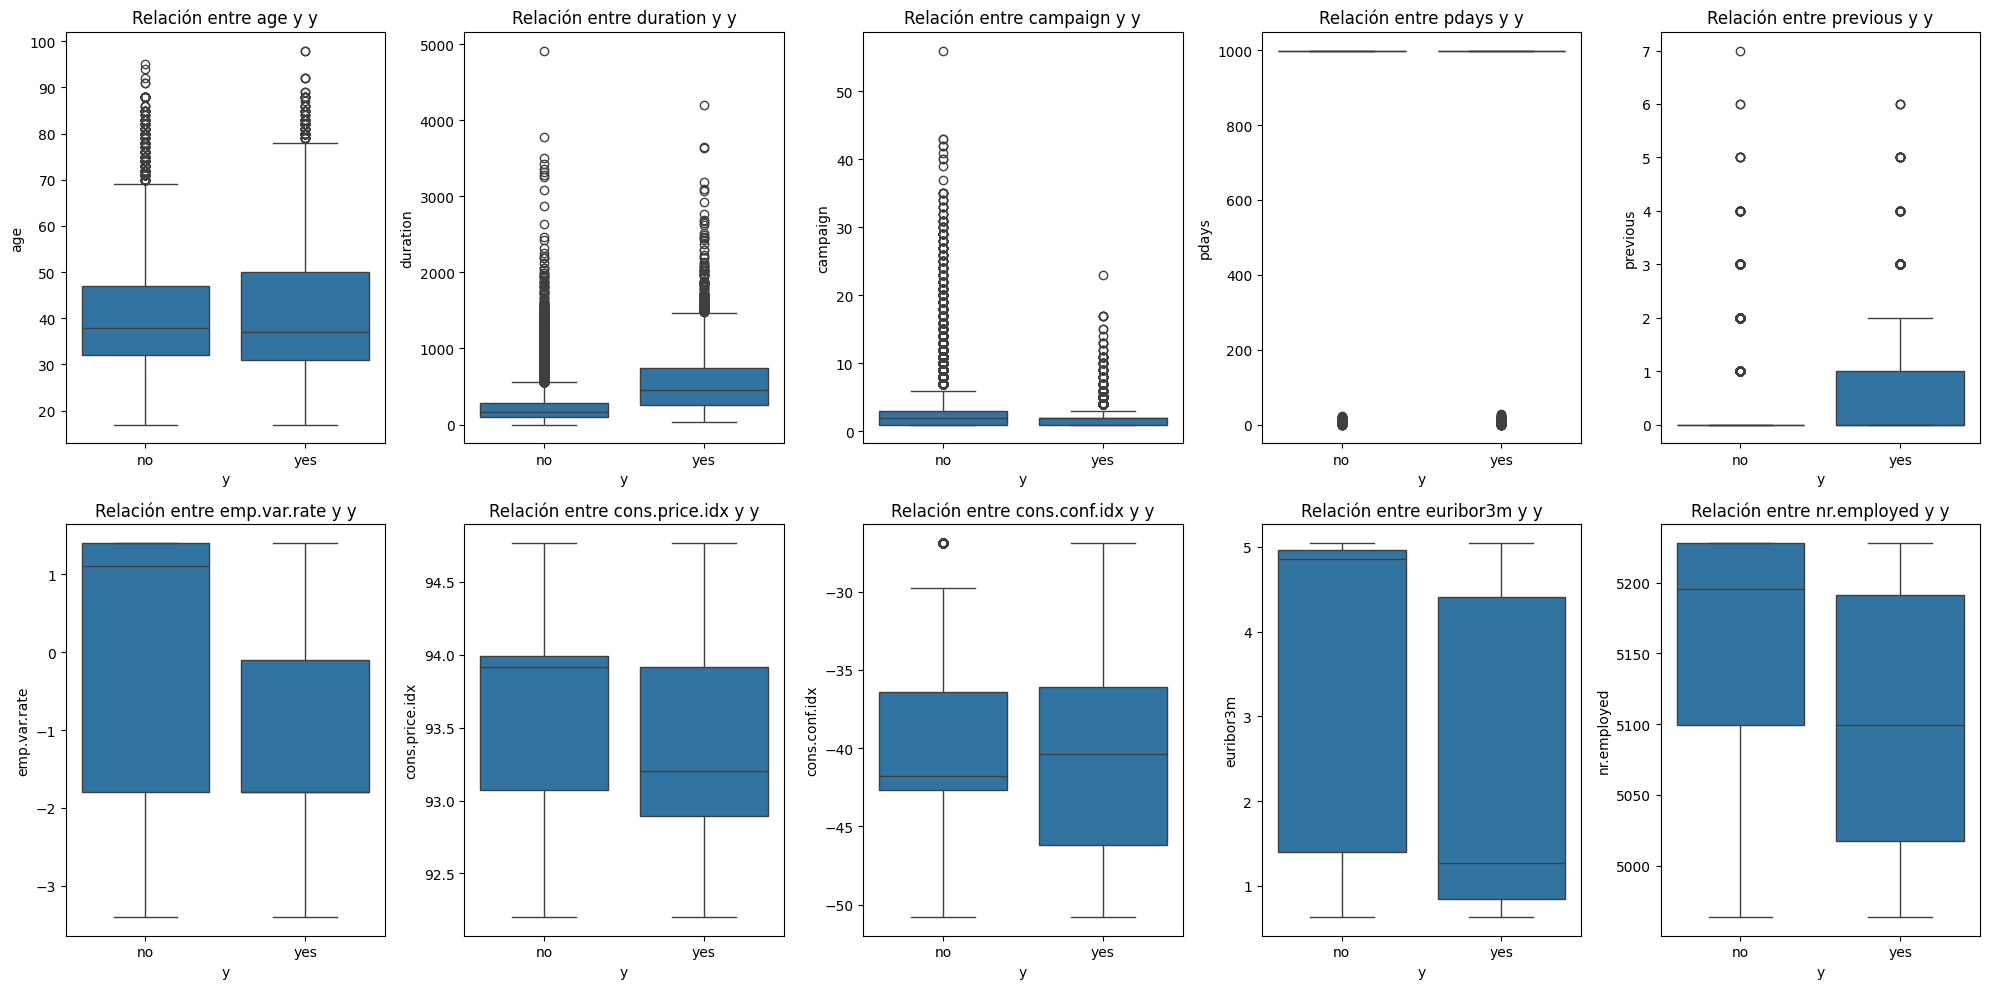

In [61]:
# Definir el tamaño de la figura
plt.figure(figsize=(20, 20))

# Características categóricas: job, marital, education, default, housing, contact, month, day_of_week, poutcome
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='y', data=data)
    plt.title(f'Relación entre {feature} y y')
    plt.xlabel(feature)
    plt.ylabel('Conteo')

# Características numéricas: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x='y', y=feature, data=data)
    plt.title(f'Relación entre {feature} y y')
    plt.xlabel('y')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [62]:
data.drop('pdays', axis=1, inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   contact         41176 non-null  object 
 7   month           41176 non-null  object 
 8   day_of_week     41176 non-null  object 
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  previous        41176 non-null  int64  
 12  poutcome        41176 non-null  object 
 13  emp.var.rate    41176 non-null  float64
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  nr.employed     41176 non-null 

Codificaión de las variables categóricas y esudio de la correlación 

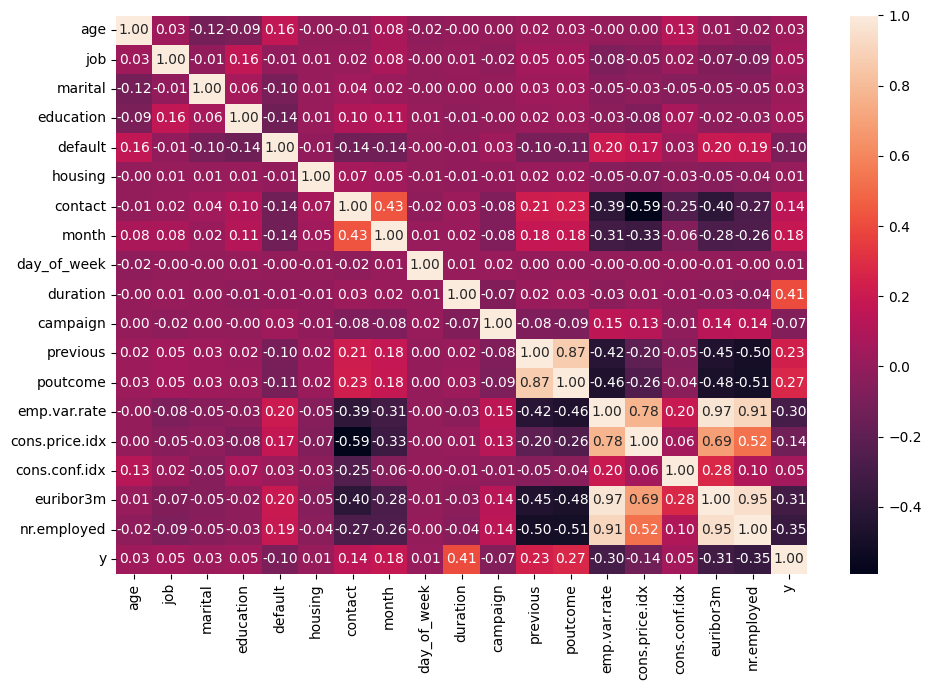

In [64]:

data["job"] = pd.factorize(data["job"])[0]
data["marital"] = pd.factorize(data["marital"])[0]
data["education"] = pd.factorize(data["education"])[0]
data["default"] = pd.factorize(data["default"])[0]
data["housing"] = pd.factorize(data["housing"])[0]
data["contact"] = pd.factorize(data["contact"])[0]
data["month"] = pd.factorize(data["month"])[0]
data["day_of_week"] = pd.factorize(data["day_of_week"])[0]
data["poutcome"] = pd.factorize(data["poutcome"])[0]
data["y"] = pd.factorize(data["y"])[0]

fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(data[["age", "job", "marital", "education", "default", "housing", "contact", "month", "day_of_week", "duration", "campaign", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Observamos que las variables que guardan más correlación con la variable objetivo son: 'duration', 'previous', 'poutcome'.

Por otro lado vemos que las variables 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' guardan muy poca correlación con la variable objetivo, pero muestran una fuerte correlación entre ellas, lo que puede dar lugar a multicolinealidad, por lo que trans confirmar este aspecto, las eliminaremos.


In [65]:
corr = data.corr()
vif = pd.Series([variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])], index=data.columns)
vif

age                   1.387034
job                   1.466044
marital               1.133852
education             1.494565
default               1.871001
housing               1.067137
contact              65.406109
month                17.365578
day_of_week           1.115719
duration              2.248996
campaign              2.046445
previous             84.409164
poutcome             86.421693
emp.var.rate      10550.034144
cons.price.idx     1187.166108
cons.conf.idx       192.872380
euribor3m         29336.499377
nr.employed       10091.768105
y                     5.516744
dtype: float64

Vemos que las variables estudiadas presentan unas cifras significativamente altas, pero no 'inf', por lo que de momento las mantendremos y estudiaremo su eliminación cuando seleccionemos las características.

4. Feature Engineering (outlier detection and process, missing values, feature scaled)
5. Feature selection
6. Save data

In [66]:
data.describe()

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,3.673863,0.510637,3.277370,0.208908,0.571959,0.634714,2.249951,1.979600,258.315815,2.567879,0.173013,0.169953,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,2.454340,0.696794,2.185558,0.406713,0.541216,0.481516,2.429157,1.411539,259.305321,2.770318,0.494964,0.455811,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,102.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.000000,0.000000,3.000000,0.000000,1.000000,1.000000,2.000000,2.000000,180.000000,2.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,3.000000,319.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.000000,3.000000,7.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   contact         41176 non-null  int64  
 7   month           41176 non-null  int64  
 8   day_of_week     41176 non-null  int64  
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  previous        41176 non-null  int64  
 12  poutcome        41176 non-null  int64  
 13  emp.var.rate    41176 non-null  float64
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  nr.employed     41176 non-null 

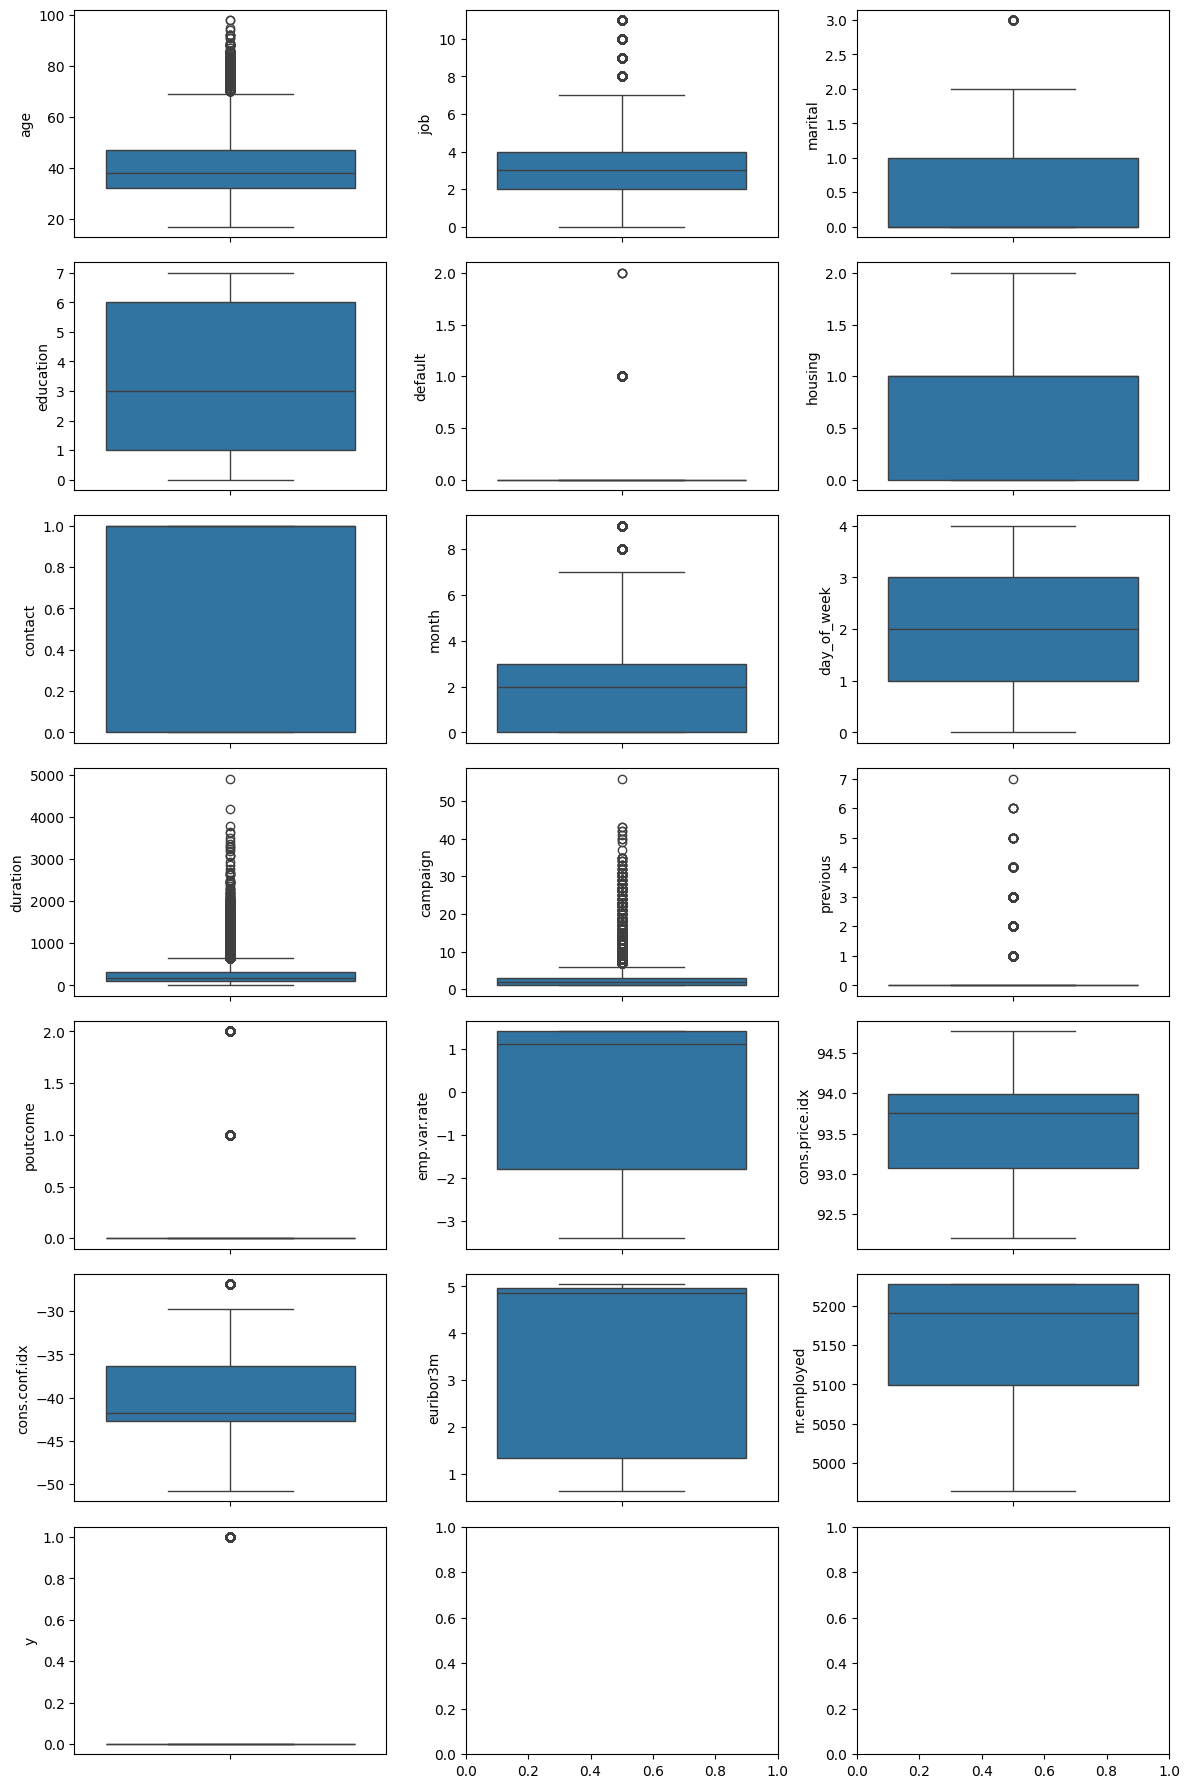

In [68]:
fig, axis = plt.subplots(7, 3, figsize=(12, 18))

sns.boxplot(ax=axis[0, 0], data=data, y="age")
sns.boxplot(ax=axis[0, 1], data=data, y="job")
sns.boxplot(ax=axis[0, 2], data=data, y="marital")
sns.boxplot(ax=axis[1, 0], data=data, y="education")
sns.boxplot(ax=axis[1, 1], data=data, y="default")
sns.boxplot(ax=axis[1, 2], data=data, y="housing")
sns.boxplot(ax=axis[2, 0], data=data, y="contact")
sns.boxplot(ax=axis[2, 1], data=data, y="month")
sns.boxplot(ax=axis[2, 2], data=data, y="day_of_week")
sns.boxplot(ax=axis[3, 0], data=data, y="duration")
sns.boxplot(ax=axis[3, 1], data=data, y="campaign")
sns.boxplot(ax=axis[3, 2], data=data, y="previous")
sns.boxplot(ax=axis[4, 0], data=data, y="poutcome")
sns.boxplot(ax=axis[4, 1], data=data, y="emp.var.rate")
sns.boxplot(ax=axis[4, 2], data=data, y="cons.price.idx")
sns.boxplot(ax=axis[5, 0], data=data, y="cons.conf.idx")
sns.boxplot(ax=axis[5, 1], data=data, y="euribor3m")
sns.boxplot(ax=axis[5, 2], data=data, y="nr.employed")
sns.boxplot(ax=axis[6, 0], data=data, y="y")

plt.tight_layout()
plt.show()

In [69]:
# Variables independientes/dependiente
X = data.drop(['y'], axis=1)
y = data['y']

# Ajusta el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

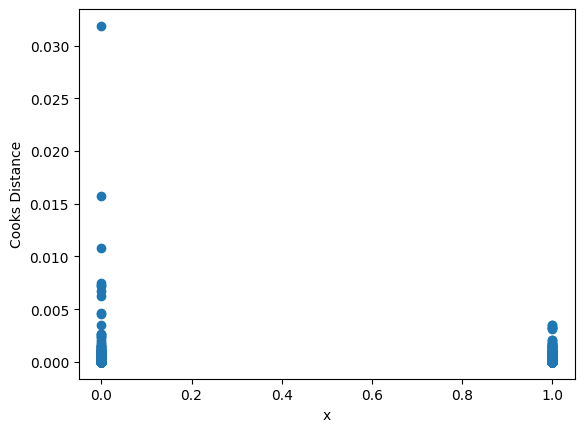

In [70]:
plt.scatter(data.y, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
np.where(cooks_distance[0]>0.01)

(array([24084, 36033, 40525]),)

In [72]:
# Visualizar las tres filas específicas
rows_to_display = [24084, 36033, 40525]
subset_data = data.iloc[rows_to_display]
print(subset_data)

       age  job  marital  education  default  housing  contact  month  \
24084   33    4        1          4        0        1        0      5   
36033   28    3        0          3        0        1        1      0   
40525   27    2        1          1        0        0        0      3   

       day_of_week  duration  campaign  previous  poutcome  emp.var.rate  \
24084            0      4918         1         0         0          -0.1   
36033            1      3509         2         2         2          -1.8   
40525            4      3785         1         0         0          -1.7   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
24084          93.200          -42.0      4.406       5195.8  0  
36033          92.893          -46.2      1.266       5099.1  0  
40525          94.027          -38.3      0.888       4991.6  0  


In [73]:
np.where(cooks_distance[0]>0.005)

(array([ 2312, 19627, 20989, 23997, 24036, 24084, 36033, 40525]),)

In [74]:
# Visualizar las tres filas específicas
rows_to_display = [2312, 19627, 20989, 23997, 24036, 24084, 36033, 40525]
subset_data = data.iloc[rows_to_display]
print(subset_data)

       age  job  marital  education  default  housing  contact  month  \
2312    39    8        0          0        1        1        0      0   
19627   47    6        0          1        0        0        1      3   
20989   47    2        0          1        0        1        1      3   
23997   46    2        2          1        0        1        0      4   
24036   27    3        1          4        0        1        0      4   
24084   33    4        1          4        0        1        0      5   
36033   28    3        0          3        0        1        1      0   
40525   27    2        1          1        0        0        0      3   

       day_of_week  duration  campaign  previous  poutcome  emp.var.rate  \
2312             1      3366         3         0         0           1.1   
19627            3      3422         1         0         0           1.4   
20989            3      3322         1         0         0           1.4   
23997            4      3253         1

Estas observaciones tienen una influencia significativa en los parámetros del modelo, lo que significa que pueden estar ejerciendo una influencia desproporcionada en la predicción del modelo.

Como nuestro objetivo es identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo, permitiendo que el banco centre sus esfuerzos de marketing en esos clientes, decidimos mantener en un primer momento los valores atípicos, ya que pueden aportar información valiosa. 

Sin embargo, eliminaremos las tres filas que presentan una mayor influencia en el modelo, ya que pueden sesgar el modelo y hacer que se ajuste demasiado a los datos, lo que podría afectar negativamente su capacidad para generalizar y predecir correctamente sobre nuevos datos.

In [75]:
# Índices de las filas a eliminar
indices_a_eliminar = [24084, 36033, 40525]

data = data.drop(indices_a_eliminar).reset_index(drop=True)

In [76]:
data.isnull().any().any()

False

- Escalado de los datos:

Dado que ninguna o casi ninguna de lass variables sigue una distribución normal ni una distribución uniforme, usaremos un escalado robusto, como la estandarización robusta o la normalización robusta.

La estandarización robusta se basa en medidas de posición y dispersión robustas, como la mediana y el rango intercuartil (IQR), en lugar de la media y la desviación estándar, lo que la hace menos sensible a los valores atípicos.

In [79]:
# Dividimos el conjunto de datos en muestras de train y test
X = data.drop("y", axis = 1)
y = data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32557,29,1,1,1,0,1,1,0,0,14,8,0,0,-1.8,92.893,-46.2,1.299,5099.1
3315,35,2,1,6,0,0,0,0,3,135,1,0,0,1.1,93.994,-36.4,4.860,5191.0
39959,50,3,0,0,0,0,1,1,1,135,4,1,1,-1.7,94.055,-39.8,0.761,4991.6
30529,19,11,1,5,0,1,1,0,0,121,5,0,0,-1.8,92.893,-46.2,1.354,5099.1
6098,34,1,0,1,0,1,0,0,1,596,1,0,0,1.1,93.994,-36.4,4.857,5191.0


In [80]:
# Inicializamos el escalador robusto
scaler = RobustScaler()

# Ajustamos el escalador a los datos de entrenamiento y transformamos los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Convertimos los datos transformados de vuelta a DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

X_train_scaled.head()

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32557,-0.600000,-1.0,1.0,-0.4,0.0,0.0,0.0,-0.666667,-1.0,-0.760369,3.0,0.0,0.0,-0.90625,-0.931447,-0.698413,-0.983688,-0.712403
3315,-0.200000,-0.5,1.0,0.6,0.0,-1.0,-1.0,-0.666667,0.5,-0.202765,-0.5,0.0,0.0,0.00000,0.266594,0.857143,0.000829,0.000000
39959,0.800000,0.0,0.0,-0.6,0.0,-1.0,0.0,-0.333333,-0.5,-0.202765,1.0,1.0,1.0,-0.87500,0.332971,0.317460,-1.132430,-1.545736
30529,-1.266667,4.0,1.0,0.4,0.0,0.0,0.0,-0.666667,-1.0,-0.267281,1.5,0.0,0.0,-0.90625,-0.931447,-0.698413,-0.968482,-0.712403
6098,-0.266667,-1.0,0.0,-0.4,0.0,0.0,-1.0,-0.666667,-0.5,1.921659,-0.5,0.0,0.0,0.00000,0.266594,0.857143,0.000000,0.000000
